<img src="https://teaching.bowyer.ai/sdsai/resources/0/img/IMPERIAL_logo_RGB_Blue_2024.svg" alt="Imperial Logo" width="500"/><br /><br />

Manipulating and Visualising Data - Tutorial Exercise Solutions
==============
### SURG70098 - Surgical Data Science and AI
### Stuart Bowyer

# Setup

In [ ]:
# Install and import
%pip install pandas
%pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 2.1

In [3]:
# This code loads the sample data for the tutorial
# YOU DO NOT NEED TO UNDERSTAND THIS YET #######################################
crp_data = pd.read_csv('https://teaching.bowyer.ai/sdsai/resources/1/data/dummy_crp_data.csv')
crp = crp_data['crp'].tolist()
patients = crp_data['patients'].tolist()
names = list(set(patients))
names.sort()
################################################################################

print(names)          # These are the names of patients in the dataset
print(crp[0:10])      # These are the CRP values
print(patients[0:10]) # These are the patients for which each CRP value was taken

def average_crp(crp, patients, poi):
    """
    Compute the average CRP value for a patient of interest (poi).

    Parameters:
    crp      : list of CRP values as strings (e.g., '1.4855 mg/L')
    patients : list of patient names corresponding to each CRP value
    poi      : string, patient of interest

    Returns:
    float : average CRP value for the patient
    """
    total = 0       # sum of CRP values for this patient
    count = 0       # number of CRP values for this patient

    for value, patient in zip(crp, patients):
        if patient == poi:
            # Remove ' mg/L' and convert to float
            numeric_value = float(value.replace(' mg/L', ''))
            total += numeric_value
            count += 1

    return total / count

# Test loop. This code:
#  * loops through all of the patient names
#  * calls your function with each name
#  * prints the result
for name in names:
    avg = average_crp(crp, patients, name)
    print(name, 'has an average CRP of', round(avg, 2), 'mg/L')

['Amelia', 'Emma', 'Liam', 'Noah', 'Oliver']
['0.1912 mg/L', '0.0697 mg/L', '6.063 mg/L', '8.7888 mg/L', '6.1414 mg/L', '5.8497 mg/L', '2.4352 mg/L', '2.4059 mg/L', '7.8755 mg/L', '9.4961 mg/L']
['Liam', 'Emma', 'Noah', 'Amelia', 'Noah', 'Noah', 'Emma', 'Amelia', 'Noah', 'Noah']
Amelia has an average CRP of 4.69 mg/L
Emma has an average CRP of 1.03 mg/L
Liam has an average CRP of 0.57 mg/L
Noah has an average CRP of 6.09 mg/L
Oliver has an average CRP of 1.41 mg/L


# Exercise 2.2
## Part A
### Load and check the data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
df = pd.read_csv('https://teaching.bowyer.ai/sdsai/resources/1/data/dummy_crp_data.csv')

# Inspect the first few rows
print("Preview of data:")
print(df.head())

Preview of data:
  patients          crp
0     Liam  0.1912 mg/L
1     Emma  0.0697 mg/L
2     Noah   6.063 mg/L
3   Amelia  8.7888 mg/L
4     Noah  6.1414 mg/L


### Clean the CRP data

In [5]:
# Remove the ' mg/L' text and convert to float
df['crp'] = df['crp'].str.removesuffix(' mg/L').astype(float)

# Check the cleaning
print(df.head())

# Verify data types
print(df.dtypes)

  patients     crp
0     Liam  0.1912
1     Emma  0.0697
2     Noah  6.0630
3   Amelia  8.7888
4     Noah  6.1414
patients     object
crp         float64
dtype: object


## Part B

In [6]:
# Group by patient and compute average CRP
avg_crp = df.groupby('patients')['crp'].mean().reset_index()

print("Average CRP per patient:")
print(avg_crp)

Average CRP per patient:
  patients       crp
0   Amelia  4.689388
1     Emma  1.027692
2     Liam  0.570865
3     Noah  6.087250
4   Oliver  1.412267


## Part C

In [7]:
# Add a new boolean column: True if CRP > 5.0
df['elevated'] = df['crp'] > 5.0

# Count elevated CRPs and calculate mean CRP per patient
summary = df.groupby('patients').agg(
    average_crp=('crp', 'mean'),
    elevated_count=('elevated', 'sum')
).reset_index()

print("Summary table:")
print(summary)

Summary table:
  patients  average_crp  elevated_count
0   Amelia     4.689388              17
1     Emma     1.027692               0
2     Liam     0.570865               0
3     Noah     6.087250              24
4   Oliver     1.412267               3


# Exercise 2.3

pulse pressure mean: 35.1805
pulse pressure median: 35.0
pulse pressure standard deviation: 11.13893880622676


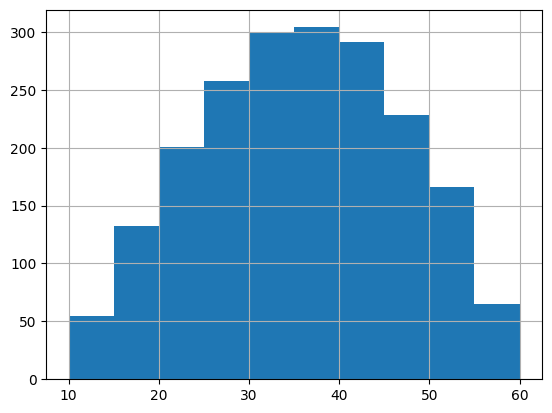

In [10]:
# Load the dataframe
df_str_data = pd.read_csv("https://teaching.bowyer.ai/sdsai/resources/2/data/str_data.csv")

# Build a pipeline to get the systolic and diastolic BP values as separate integers
df_bp = df_str_data['bp'] \
  .str.rstrip(' mmHg') \
  .str.split("/", expand=True) \
  .rename({0: 'systolic', 1: 'diastolic'}, axis=1) \
  .astype(int)

pulse_pressure = df_bp['systolic'] - df_bp['diastolic']

print(f'pulse pressure mean: {pulse_pressure.mean()}')
print(f'pulse pressure median: {pulse_pressure.median()}')
print(f'pulse pressure standard deviation: {pulse_pressure.std()}')

pulse_pressure.hist(bins=10)
plt.show()

# Exercise 2.4
## Part A - Basic Demographics Plots

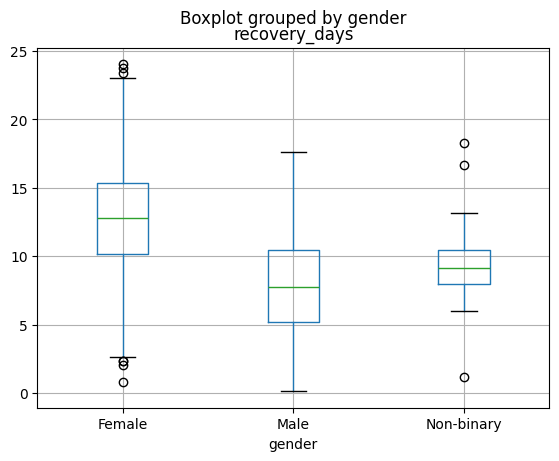

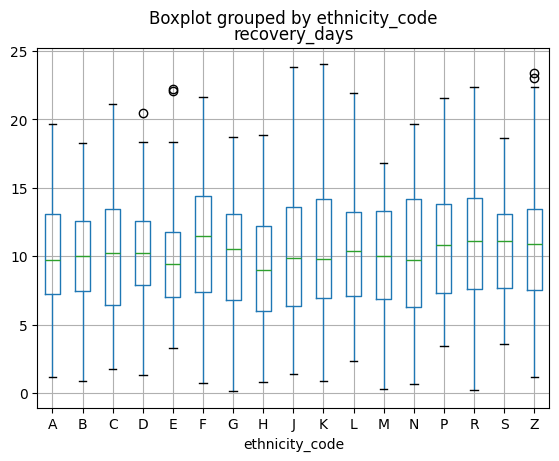

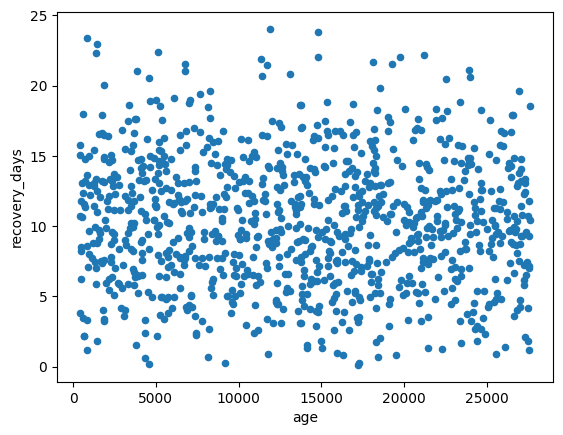

In [11]:
# Load datasets
df_demographics = pd.read_csv("https://teaching.bowyer.ai/sdsai/resources/2/data/demographics.csv")
df_recovery = pd.read_csv("https://teaching.bowyer.ai/sdsai/resources/2/data/simple_recovery.csv")

## Start with Demographics
# Merge the dataframes together
df = pd.merge(df_demographics, df_recovery, on='id')

# gender vs recovery
df.boxplot(column='recovery_days', by='gender')
plt.show()

# ethnicity vs recovery
df.boxplot(column='recovery_days', by='ethnicity_code')
plt.show()

# age vs recovery
#   - first add a new column with the patient's age (in days)
df['age'] = (pd.to_datetime('now') - pd.to_datetime(df['date_of_birth'])).dt.days
df.plot('age','recovery_days', kind='scatter')
plt.show()

Without worrying about statistical testing (for now), these plots seem to show that recovery time is associated with gender. Females have the longest recovery time.

The ethnicity code 'D' has the highest median recovery time and 'B/C' the lowest, however, there is no clear strong pattern.

They scatter plot appears to show that recovery time is not associated with age. One could group the ages into categories to investigate this further.


## Part B - Grouped Ethnicity Plot

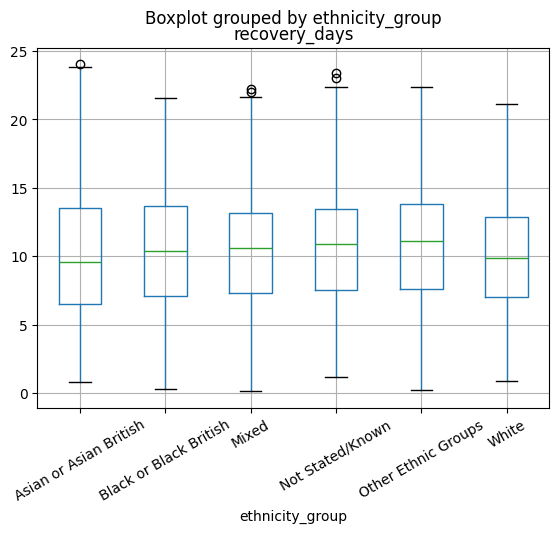

In [12]:
# Create a function that converts an ethnicity code to an ethnicity group
#   - this function relies on the ability to query if a character is in a string
def ethnicity_code2group(code):
  if code in 'ABC':
    return 'White'
  elif code in 'DEFG':
    return 'Mixed'
  elif code in 'HJKL':
    return 'Asian or Asian British'
  elif code in 'MNP':
    return 'Black or Black British'
  elif code in 'RS':
    return 'Other Ethnic Groups'
  else:
    return 'Not Stated/Known'

# Add the ethnicity_group column
df['ethnicity_group'] = df['ethnicity_code'].apply(ethnicity_code2group)

# Plot
#   - rotate the labels to make them visible and not overlapped
df.boxplot(column='recovery_days', by='ethnicity_group', rot=30)
plt.show()

Again, without applying any statistical testing, this does not show any large differences between groups. Though patients with 'Not stated/known' ethnicities appear to have the highest median recovery time.

## Part C - Plotting Lab Tests

In [13]:
# Load the data frame
df_lab_tests = pd.read_csv("https://teaching.bowyer.ai/sdsai/resources/2/data/laboratory_tests.csv")

# Merge datasets
#   - note that in the df_lab_tests, the id refers to the lab test id
#     so you need to merge on the 'patient_id'
df_lab_reco = pd.merge(df_recovery, df_lab_tests, left_on='id', right_on='patient_id')

# Remove the now unneeded columns to make things cleaner
df_long = df_lab_reco[['patient_id', 'recovery_days', 'test', 'value']]

# Here I choose to pivot the data into a wide format to make the next steps
# easier/clearer to understand. You could continue in the long format if you
# wanted
df_wide = df_long.pivot(index=['patient_id','recovery_days'], columns='test', values='value').reset_index()

First, we plot the WBC z-scores as these look the easiest as they don't require any complicated conversion

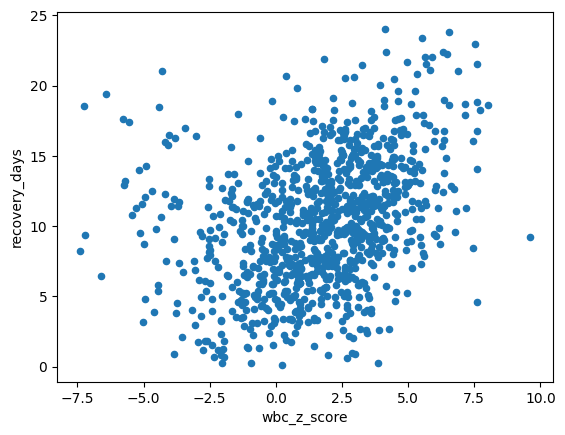

In [14]:
# Convert the wbc_z_score to a numeric value directly
df_wide['wbc_z_score'] = df_wide['wbc_z_score'].astype('float')

# Plot
df_wide.plot('wbc_z_score', 'recovery_days', kind='scatter')
plt.show()

This scatter plot seems to show that increasing WBC associates with increasing recovery times. However the scatter plots are sometimes difficult to make this fully clear.

So, we can also try to discretise the WBC into 2 wide bins, and produce a boxplot.

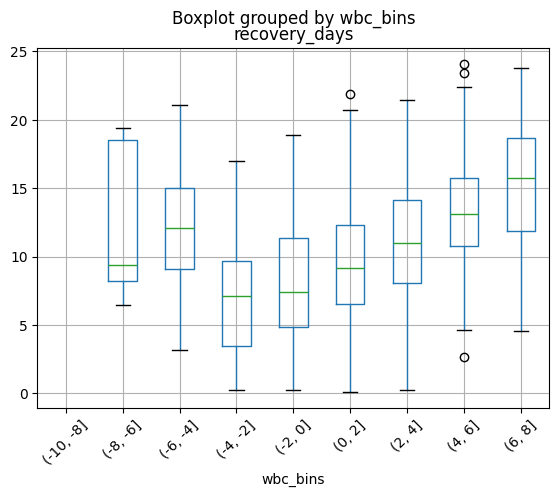

In [15]:
df_wide['wbc_bins'] = pd.cut(df_wide['wbc_z_score'], range(-10,10,2))
df_wide.boxplot(by='wbc_bins', column='recovery_days', rot=45)
plt.show()

Next, we plot the CRP values. If you look at the data, you will see the CRP column has a mix of units that need interpreting and converting.

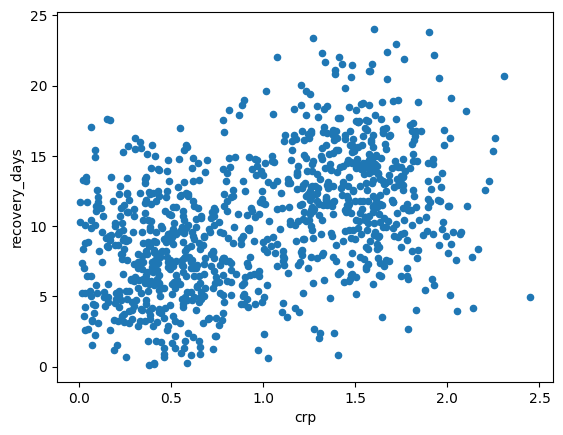

In [16]:
# start by building a separate dataframe with the split values and units
crp_units = df_wide['crp'] \
  .str.split(' ', expand=True) \
  .rename({0: 'val', 1: 'unit'}, axis=1)

# convert the val column to float
crp_units['val'] = crp_units['val'].astype('float')

# update the values
where_gl = crp_units['unit'] == 'g/L'
crp_units.loc[where_gl, 'val'] = crp_units.loc[where_gl, 'val'] * 1000

# add this column back into the main table - just for organisation really
df_wide['crp'] = crp_units['val']

# plot
df_wide.plot('crp', 'recovery_days', kind='scatter')
plt.show()

This plot seems to show an association between increasing CRP and increasing recovery days, but, again, scatter plots are sometimes difficult to make this fully clear.

So, we can also try to discretise the CRP into 0.5 wide bins, and produce a boxplot.

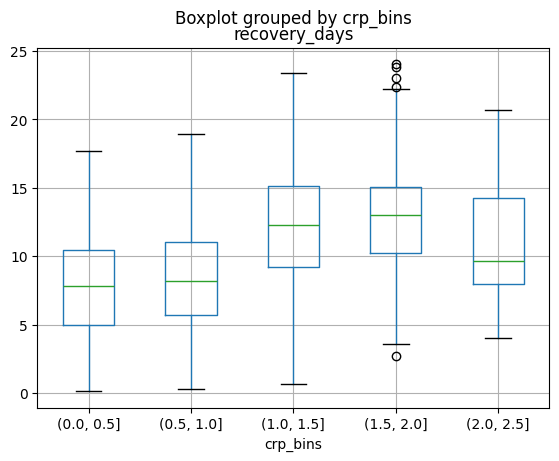

In [17]:
df_wide['crp_bins'] = pd.cut(df_wide['crp'], [0,0.5,1,1.5,2,2.5])
df_wide.boxplot(by='crp_bins', column='recovery_days')
plt.show()

Finaly, we plot the albumin levels.

The string values in this column need processing and grouping to make them plottable.


['normal' 'low' 'verylow' 'NORMAL' 'high' 'veryhigh' 'HIGH' 'LOW']


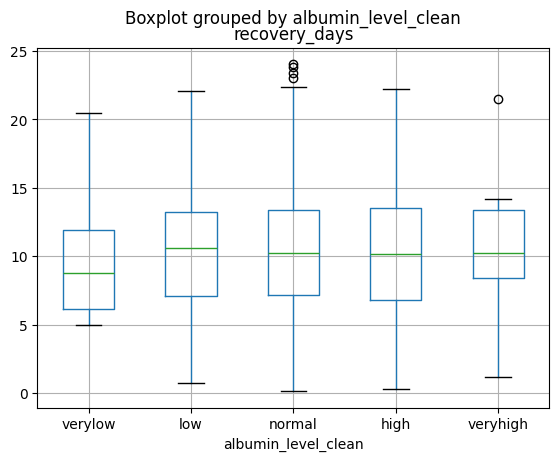

In [18]:
# Start by seeing which values the column takes
print(df_wide['albumin_level'].unique())

# Convert to strings to lowercase to remove duplicates
df_wide['albumin_level_clean'] = df_wide['albumin_level'].str.lower()

# Plot
df_wide.boxplot(column='recovery_days', by='albumin_level_clean', positions=[4,2,3,5,1])
plt.show()

## Part D - Gender Stratified Lab Plots
To stratify our lab plots by gender, we need to join the gender column to the data frame.

To stratify by gender, we simply need to add it to the by parameter of the boxplot method. You could also achieve the same thing by splitting your dataframe into parts (one for each gender in the dataset) and then plot each individually.

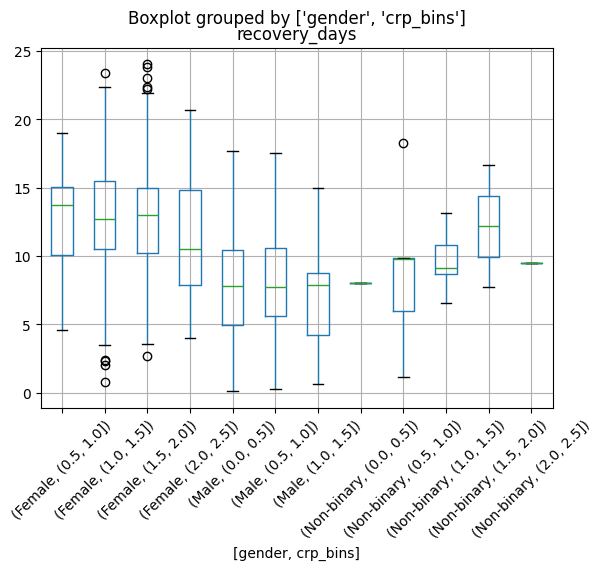

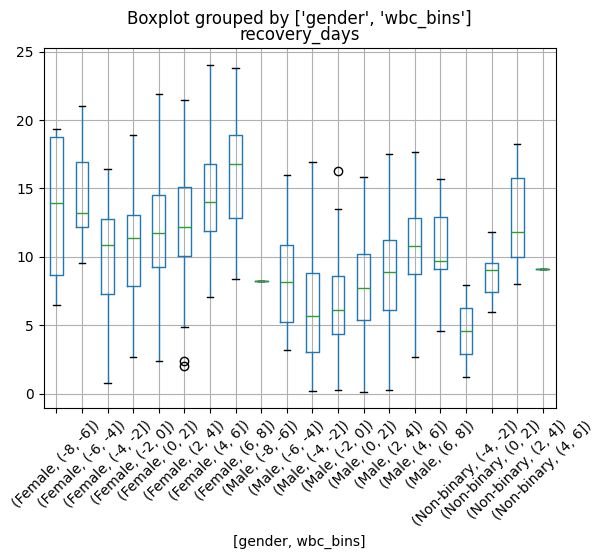

In [19]:
# Merge the data frames
#   - again, note that the patient id columns have difference names
#   - we only take the 'id' and 'gender' columns from demographics to keep the table clean
df_combined = df_wide.merge(df_demographics[['id','gender']], left_on='patient_id', right_on='id')

# Stratified plots
df_combined.boxplot(by=['gender','crp_bins'], column=['recovery_days'], rot=45)
plt.show()

df_combined.boxplot(by=['gender','wbc_bins'], column=['recovery_days'], rot=45)
plt.show()

These visualisations illustrate that the association of CRP with recovery time is largely explained by the gender. i.e. there is little within-gender variation in recovery duration as CRP values increase.

The second visualisation illustrates that the association of WBC with recovery time is NOT explained by the gender. i.e. a similar pattern of increasing recovery time with increasing WBC is observed for the within-gender groups.